# Information gain Method: 

### This method measures the amount of information gained by splitting the data based on a particular feature. The feature that results in the highest information gain is selected as the splitting criterion. This method is commonly used in decision tree models and could be a good starting point for your dataset.

In [134]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

le = LabelEncoder()

In [94]:
st_path = 'C:/Users/lenovo/DataSet/CIC-IDS-2017/GeneratedLabelledFlows/TrafficLabelling/'
st_file = 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
st_file2 = 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
# st_file_merged = 'merged.csv'
# st_file = 'Friday-WorkingHours-Morning.pcap_ISCX.csv'
# st_file = 'Monday-WorkingHours.pcap_ISCX.csv'
# st_file = 'Tuesday-WorkingHours.pcap_ISCX.csv'
encoding = 'utf_8'
df_data = pd.read_csv(os.path.join(st_path, st_file), encoding=encoding)
df_data2 = pd.read_csv(os.path.join(st_path, st_file2), encoding=encoding)
df_data.columns
# df_data.head()

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [80]:
st_path_test_file = 'C:/Users/lenovo/DataSet/MachineLearningCSV/MachineLearningCVE/'
st_file_test_file = 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
encoding = 'utf_8'
df_data_test_file= pd.read_csv(os.path.join(st_path_test_file, st_file_test_file), encoding=encoding)

In [109]:
filtered_df = df_data[df_data[' Label'] != 'BENIGN']
label_column = filtered_df[' Label']
unique_labels = label_column.unique()
print(unique_labels)

['DDoS']


In [11]:
# Explain why we are dropping these columns
# df_features = df_data.drop(['Flow ID',' Source IP', 'Flow ID', ' Timestamp', ' Destination IP', ' Source Port'], axis=1)  # Features
#  = df_data[' Label']  # Target variable

# df_features_test_file = df_data_test_file  # Features
# df_target_test_file = df_data_test_file[' Label']  # Target variable

## Step 1: Calculate the entropy of the target variable

In [110]:
p_attack = (df_data[" Label"] == "DDoS").mean()
p_normal = (df_data[" Label"] == "BENIGN").mean()
entropy = -(p_attack * np.log2(p_attack)) - (p_normal * np.log2(p_normal))
print('The entropy of the target variable is: ', entropy)

The entropy of the target variable is:  0.9869574117989877


In [111]:
# Split the dataset into features and target variable
X = df_data.drop(" Label", axis=1)  # df_features
y = df_data[" Label"]  # df_target

In [112]:
# Iterate over the columns in the dataframe to check if they are strings
for st_col in X.columns:
    if X[st_col].dtypes not in ['int64', 'float64']:
        print(X[st_col].dtypes)
        X[st_col] = le.fit_transform(X[st_col])

# for st_col in df_features_test_file.columns:
#     if df_features_test_file[st_col].dtypes not in ['int64', 'float64']:
#         print(df_features_test_file[st_col].dtypes)
#         df_features_test_file[st_col] = le.fit_transform(df_features_test_file[st_col])

object
object
object
object


In [113]:
# Search for columns with infinite values
lt_columns = X[X.columns[X.max() == np.inf]].columns
# lt_columns_test_file = df_features_test_file[df_features_test_file.columns[df_features_test_file.max() == np.inf]].columns

In [114]:
# modify infinite values (10 x max)
for st_column_inf in lt_columns:
    print(st_column_inf)
    df_column_aux = X[st_column_inf]
    # identify the max value
    vl_max_aux = df_column_aux[df_column_aux < np.inf].max()
    print(vl_max_aux)
    # .loc is important to modify the value in the dataframe
    X.loc[X[st_column_inf] == np.inf, st_column_inf] = 10*vl_max_aux

Flow Bytes/s
2070000000.0
 Flow Packets/s
3000000.0


In [115]:
# check if there are still columns with infinite values

lt_columns = X[X.columns[X.max() == np.inf]].columns
print('columns inf', lt_columns)

columns inf Index([], dtype='object')


In [116]:
# Search for the columns with NaN values
for st_column_nan in X.columns:
    df_column_aux = X[X[st_column_nan].isna()].copy()
    if len(df_column_aux) > 0:
        print(df_column_aux.transpose())
        print(y[X[st_column_nan].isna()].transpose())
        print(st_column_nan)
        print('The total amount of NaNs are', len(X[X[st_column_nan].isna()]))
        print('State before NaN: ', X[st_column_nan].describe())

# X[st_column_nan].describe()

# Drop the rows with NaN values
X.dropna(inplace=True)
y = y[y.index.isin(X.index)]

print('State after NaN: ', X[st_column_nan].describe()) 

# Encode the target variable if it's not numerical
if y.dtype == 'object':
    y = le.fit_transform(y)

# Define the oversampling and undersampling methods
over_sampler = RandomOverSampler(sampling_strategy='auto')
under_sampler = RandomUnderSampler(sampling_strategy='auto')

# Create a pipeline for resampling
pipeline = Pipeline(steps=[('o', over_sampler), ('u', under_sampler)])

# Fit and transform the dataset using the pipeline
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Check the new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
new_class_distribution = dict(zip(unique, counts))
print(new_class_distribution)

# Scale numerical features
scaler = StandardScaler()
mt_features_scaled = scaler.fit_transform(X_resampled)




                    6796     14739    15047    209728
Flow ID            57339.0  59849.0  58541.0  58653.0
 Source IP           779.0    703.0    698.0    698.0
 Source Port          80.0  37575.0  48283.0  39026.0
 Destination IP      860.0    863.0      0.0    867.0
 Destination Port  36812.0  53581.0     80.0  18467.0
...                    ...      ...      ...      ...
 Active Min            0.0      0.0      0.0      0.0
Idle Mean              0.0      0.0      0.0      0.0
 Idle Std              0.0      0.0      0.0      0.0
 Idle Max              0.0      0.0      0.0      0.0
 Idle Min              0.0      0.0      0.0      0.0

[84 rows x 4 columns]
6796      BENIGN
14739     BENIGN
15047     BENIGN
209728    BENIGN
Name:  Label, dtype: object
Flow Bytes/s
The total amount of NaNs are 4
State before NaN:  count    2.257410e+05
mean     3.336256e+06
std      2.392050e+08
min     -1.200000e+07
25%      1.209087e+01
50%      1.136606e+03
75%      2.159723e+04
max      2.07000

In [117]:
print('State after NaN: ', X[st_column_nan].describe()) 

State after NaN:  count    2.257410e+05
mean     7.755493e+06
std      1.983124e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.422871e+06
max      1.200000e+08
Name:  Idle Min, dtype: float64


In [75]:
# Scale numerical features
scaler = StandardScaler()
mt_features_scaled = scaler.fit_transform(X)


## Step 2: Calculate the information gain for each feature

In [77]:
import numpy as np
import pandas as pd

def calculate_entropy(probs):
    probs = np.array(probs)
    non_zero_probs = probs[probs > 0]
    return -np.sum(non_zero_probs * np.log2(non_zero_probs))

## Step 2: Calculate the information gain for each feature

# Calculate the information gain for each feature
features = df_data.drop(" Label", axis=1).columns
information_gains = []

for feature in features:
    # Calculate entropy before splitting on the feature
    entropy_before_split = entropy
    
    # Calculate entropy after splitting on the feature
    grouped_data = df_data.groupby([feature, " Label"]).size().unstack(fill_value=0)
    grouped_probs = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    entropies = grouped_probs.apply(calculate_entropy, axis=1)
    p_values = df_data[feature].value_counts(normalize=True)
    
    entropy_after_split = (p_values * entropies).sum()
    
    # Calculate information gain
    information_gain = entropy_before_split - entropy_after_split
    information_gains.append(information_gain)


In [118]:
# Impute missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Encode the target variable if it's not numerical
if y.dtype == 'object':
    y = le.fit_transform(y)

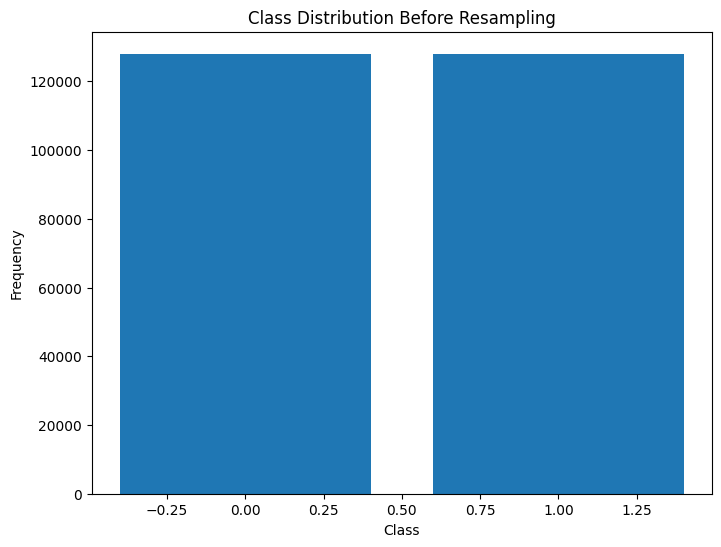

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(new_class_distribution.keys(), new_class_distribution.values())
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution Before Resampling")
plt.show()


In [123]:
# Define the oversampling and undersampling methods
over_sampler = RandomOverSampler(sampling_strategy='auto')
under_sampler = RandomUnderSampler(sampling_strategy='auto')

# Create a pipeline for resampling
pipeline = Pipeline(steps=[('o', over_sampler), ('u', under_sampler)])

# Fit and transform the dataset using the pipeline
X_resampled, y_resampled = pipeline.fit_resample(X_imputed, y)

# Encode the target variable if it's not numerical
if y.dtype == 'object':
    y = le.fit_transform(y)

# Define the oversampling and undersampling methods
over_sampler = RandomOverSampler(sampling_strategy='auto')
under_sampler = RandomUnderSampler(sampling_strategy='auto')

# Create a pipeline for resampling
pipeline = Pipeline(steps=[('o', over_sampler), ('u', under_sampler)])

# Fit and transform the dataset using the pipeline
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Check the new class distribution
unique, counts = np.unique(y_resampled, return_counts=True)
new_class_distribution = dict(zip(unique, counts))
print('new_class_distribution:', new_class_distribution)

# Scale numerical features
scaler = StandardScaler()
mt_features_scaled = scaler.fit_transform(X_resampled)

new_class_distribution: {0: 128027, 1: 128027}


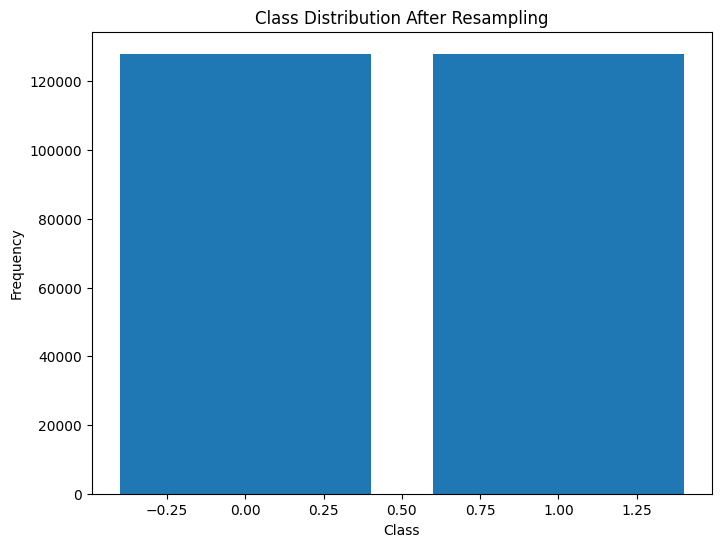

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(new_class_distribution.keys(), new_class_distribution.values())
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution After Resampling")
plt.show()

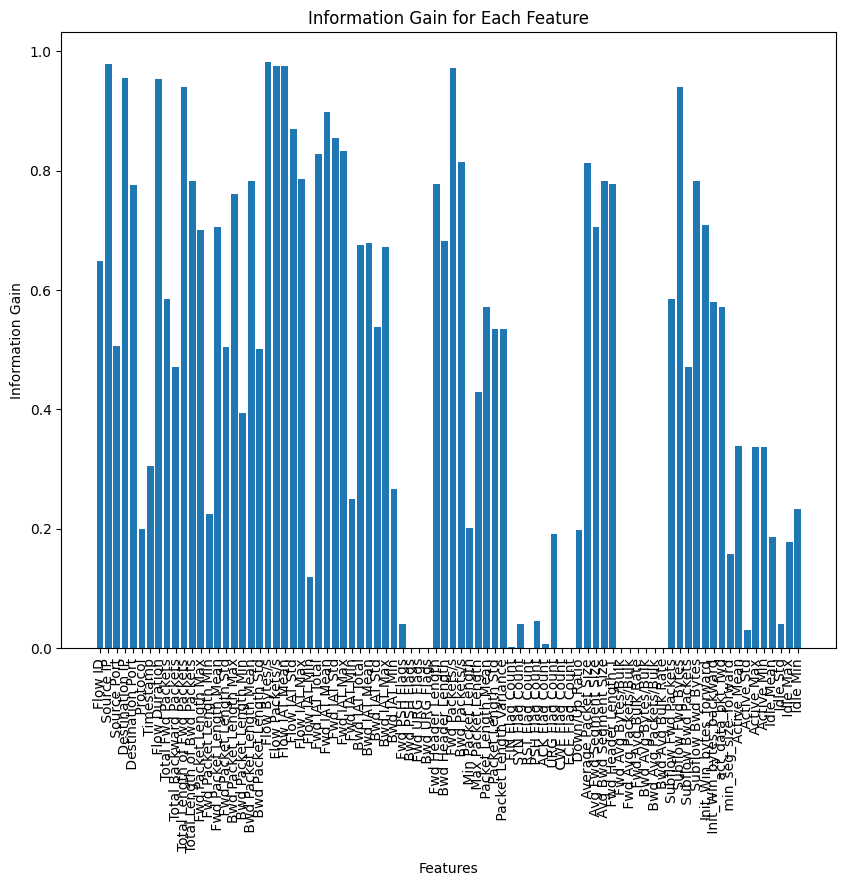

In [125]:
plt.figure(figsize=(10, 8))
plt.bar(features, information_gains, align="center")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.title("Information Gain for Each Feature")
plt.show()


In [129]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [130]:
# Define a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [131]:
# Fit the classifier to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[[38347     2]
 [    0 38468]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38349
           1       1.00      1.00      1.00     38468

    accuracy                           1.00     76817
   macro avg       1.00      1.00      1.00     76817
weighted avg       1.00      1.00      1.00     76817



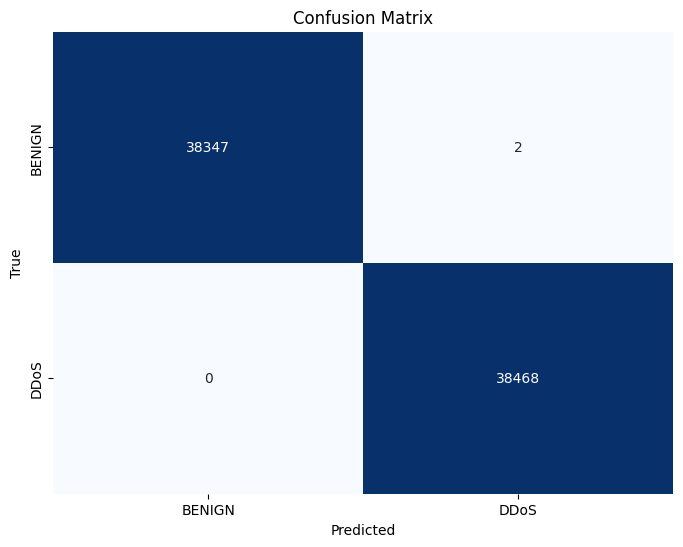

In [135]:

## Step 2: Calculate the information gain for each feature

def calculate_entropy(probs):
    probs = np.array(probs)
    non_zero_probs = probs[probs > 0]
    return -np.sum(non_zero_probs * np.log2(non_zero_probs))

## Step 2: Calculate the information gain for each feature

# Calculate the information gain for each feature
features = df_data.drop(" Label", axis=1).columns
information_gains = []

for feature in features:
    # Calculate entropy before splitting on the feature
    entropy_before_split = entropy
    
    # Calculate entropy after splitting on the feature
    grouped_data = df_data.groupby([feature, " Label"]).size().unstack(fill_value=0)
    grouped_probs = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    entropies = grouped_probs.apply(calculate_entropy, axis=1)
    p_values = df_data[feature].value_counts(normalize=True)
    
    entropy_after_split = (p_values * entropies).sum()
    
    # Calculate information gain
    information_gain = entropy_before_split - entropy_after_split
    information_gains.append(information_gain)


# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mt_features_scaled, y_resampled, test_size=0.3, random_state=42)

# Train a Decision Tree model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the confusion matrix

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.concatenate((["BENIGN"], unique_labels))

# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, labels)

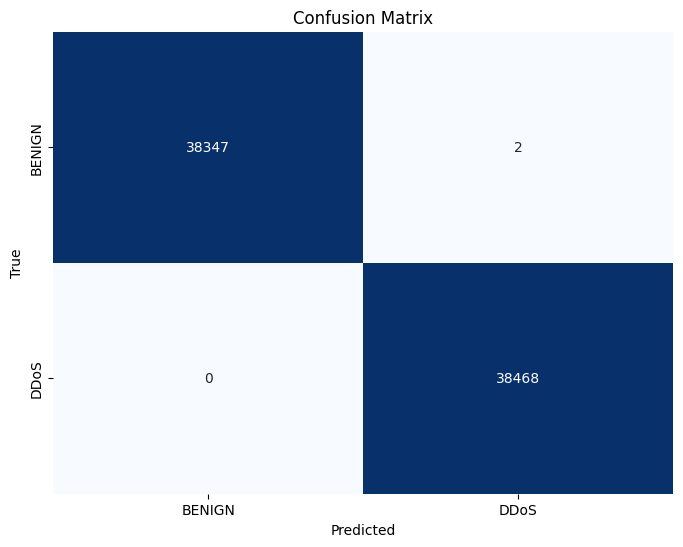

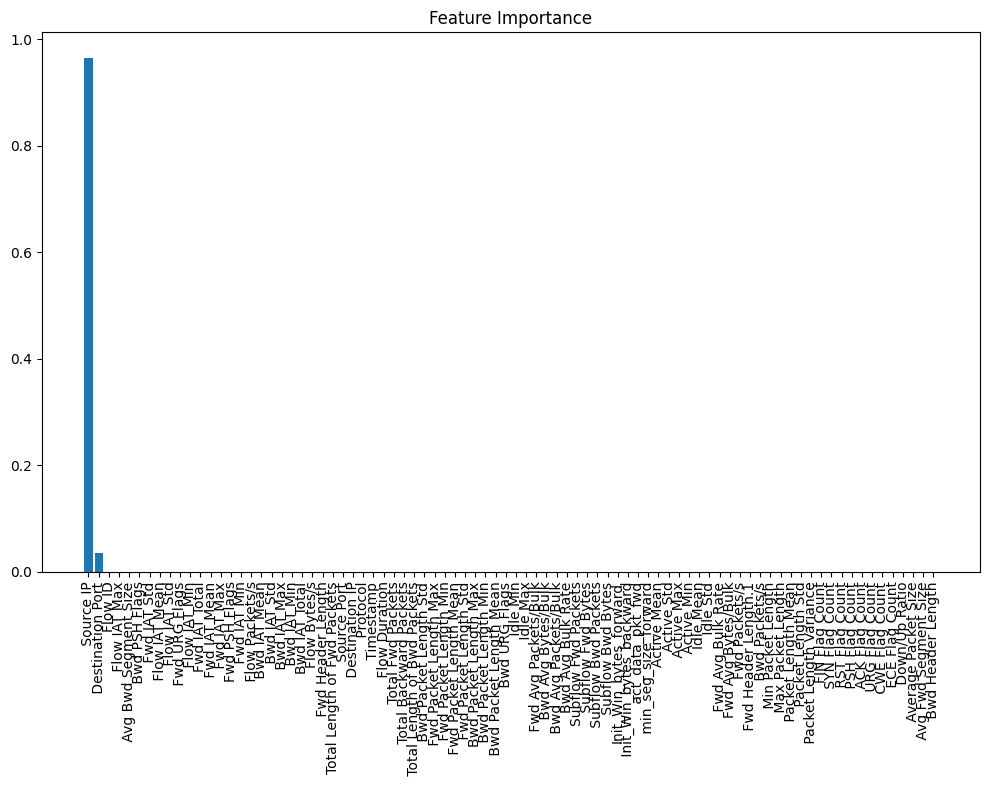

In [136]:
# Call the function to plot the confusion matrix
plot_confusion_matrix(cm, labels)

# Plot feature importances
def plot_feature_importance(importances, feature_names):
    sorted_indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 8))
    plt.title("Feature Importance")
    plt.bar(range(X_train.shape[1]), importances[sorted_indices], align="center")
    plt.xticks(range(X_train.shape[1]), feature_names[sorted_indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Get feature importances from the trained model
feature_importances = dt_classifier.feature_importances_
feature_names = X.columns

# Call the function to plot the feature importance
plot_feature_importance(feature_importances, feature_names)

Step 1: Calculate the entropy of the target variable

In your dataset, the target variable is the "Label" column which indicates whether the traffic is an attack or not.
Calculate the entropy of the target variable using the following formula:
entropy = - (p_attack * log2(p_attack)) - (p_normal * log2(p_normal))
where p_attack is the proportion of attack samples and p_normal is the proportion of normal samples in the dataset.
Step 2: Calculate the information gain for each feature

For each feature in your dataset, calculate the information gain using the following formula:
information_gain = entropy_before_split - entropy_after_split
where entropy_before_split is the entropy of the target variable before splitting on the feature, and entropy_after_split is the weighted average entropy of the target variable after splitting on the feature.
To calculate the entropy_after_split, you need to calculate the entropy for each possible value of the feature and then take a weighted average of these entropies based on the proportion of samples in each value.
Repeat this process for each feature in your dataset.
Step 3: Select the feature with the highest information gain

Identify the feature with the highest information gain, and use this feature as the splitting criterion for the decision tree.
Remove this feature from the dataset and repeat the process with the remaining features until you have built your decision tree model.
It is worth noting that the information gain method can be biased towards features with many possible values or features that are highly correlated with the target variable. Therefore, it is recommended to also try other feature selection methods and compare their performance.

In [132]:
# Calculate the information gain for each feature
information_gain = clf.feature_importances_

In [133]:
# Get the indices of the non-zero features
nonzero_indices = np.where(information_gain != 0)[0]

# Get the information gain for the non-zero features
nonzero_information_gain = information_gain[nonzero_indices]

# Get the feature names for the non-zero features
nonzero_feature_names = X.columns[nonzero_indices]

# Sort the features by importance (in descending order)
sorted_indices = np.argsort(nonzero_information_gain)[::-1]
sorted_information_gain = nonzero_information_gain[sorted_indices]
sorted_feature_names = nonzero_feature_names[sorted_indices]

# Print the sorted features and their information gain
for feature, score in zip(sorted_feature_names, sorted_information_gain):
    print(feature, score)

 Source IP 0.9704136034571545
 Destination Port 0.029560627271034708
Flow ID 2.576927181075121e-05


In [60]:
# Print the information gain for each feature
for feature, score in zip(X.columns, information_gain):
    print(feature, score)

Flow ID 2.254723722351249e-05
 Source IP 0.9697151492763584
 Source Port 0.0
 Destination IP 0.0
 Destination Port 0.030262303486418052
 Protocol 0.0
 Timestamp 0.0
 Flow Duration 0.0
 Total Fwd Packets 0.0
 Total Backward Packets 0.0
Total Length of Fwd Packets 0.0
 Total Length of Bwd Packets 0.0
 Fwd Packet Length Max 0.0
 Fwd Packet Length Min 0.0
 Fwd Packet Length Mean 0.0
 Fwd Packet Length Std 0.0
Bwd Packet Length Max 0.0
 Bwd Packet Length Min 0.0
 Bwd Packet Length Mean 0.0
 Bwd Packet Length Std 0.0
Flow Bytes/s 0.0
 Flow Packets/s 0.0
 Flow IAT Mean 0.0
 Flow IAT Std 0.0
 Flow IAT Max 0.0
 Flow IAT Min 0.0
Fwd IAT Total 0.0
 Fwd IAT Mean 0.0
 Fwd IAT Std 0.0
 Fwd IAT Max 0.0
 Fwd IAT Min 0.0
Bwd IAT Total 0.0
 Bwd IAT Mean 0.0
 Bwd IAT Std 0.0
 Bwd IAT Max 0.0
 Bwd IAT Min 0.0
Fwd PSH Flags 0.0
 Bwd PSH Flags 0.0
 Fwd URG Flags 0.0
 Bwd URG Flags 0.0
 Fwd Header Length 0.0
 Bwd Header Length 0.0
Fwd Packets/s 0.0
 Bwd Packets/s 0.0
 Min Packet Length 0.0
 Max Packet Length